# TCT - Day 16
- clustering, kmeans
- classification, random forest (ensemble techniques)

# Clustering example, Kmeans

**To remember**
- Clustering is an unsupervised machine learning technique 
- There are three main clustering algorightms:
    - distance based (kmeans)
    - agglomerative (hierarchical)
    - density based (dbscan)
- We use 'elbow method' to determie the right number of clusters for our model
- It is a good idea to perform PCA prior to modeling
- We use boxplots and describe to interpret clusters, also 2D & 3D visuals between attributes

In [71]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics

tech_supp_df = pd.read_csv("technical_support_data.csv")
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [72]:
tech_supp_df

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5


In [73]:
tech_supp_df=tech_supp_df.iloc[:,1:]

In [74]:
tech_supp_df_scaled=tech_supp_df.apply(zscore)

In [79]:
tech_supp_df_scaled

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572


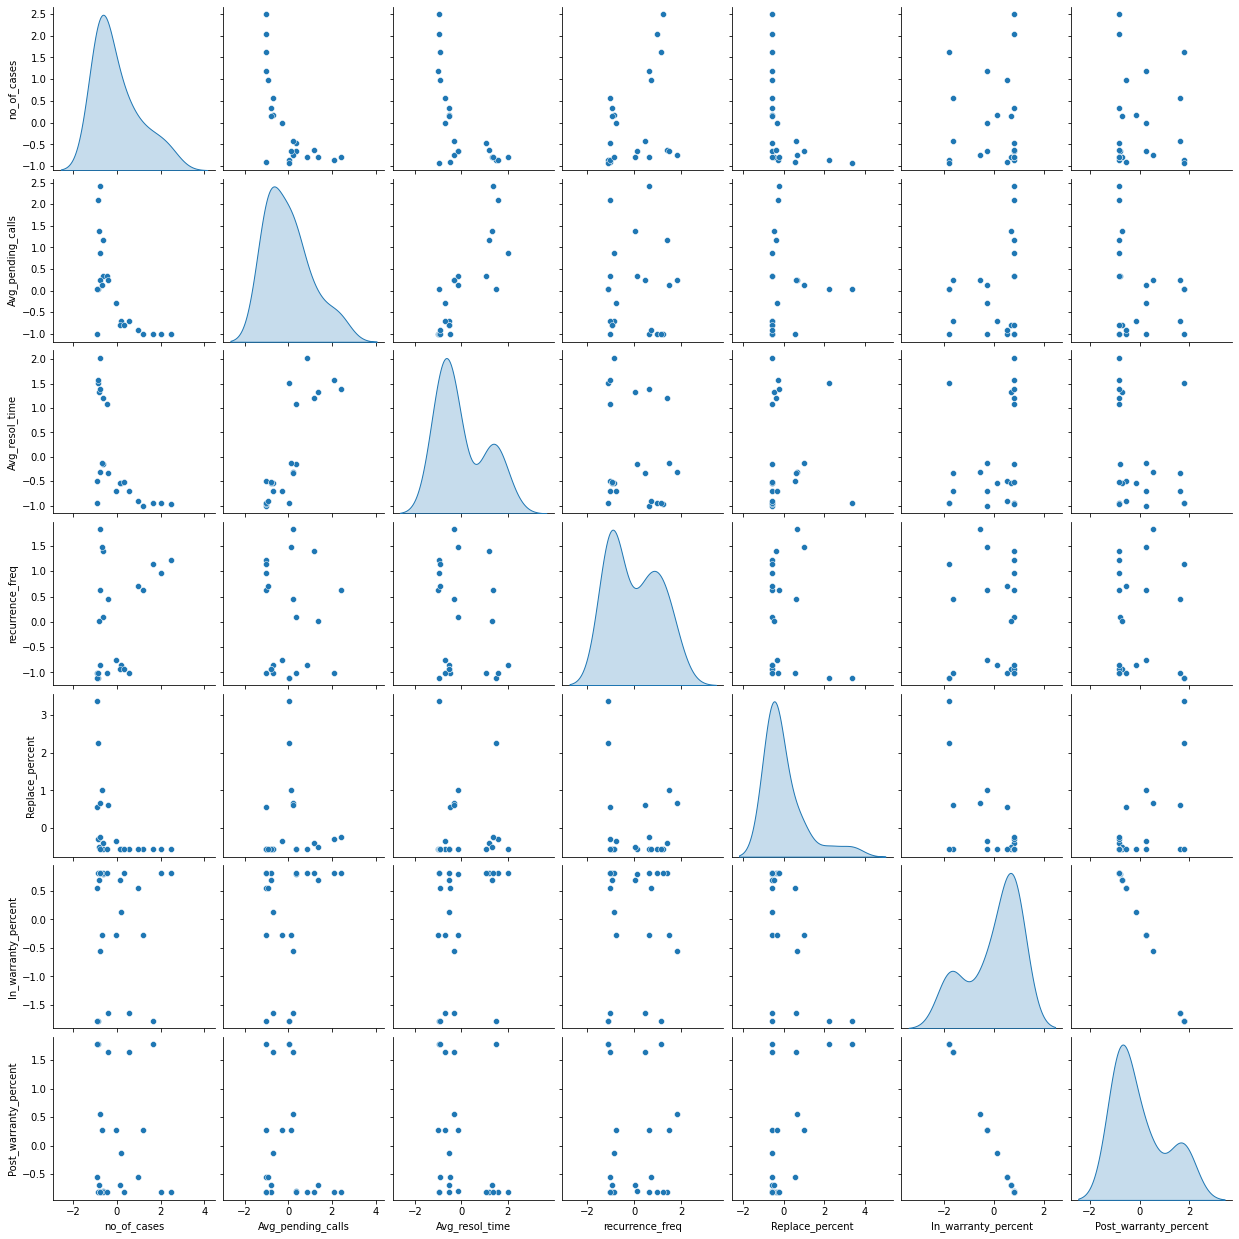

In [12]:
sns.pairplot(tech_supp_df_scaled, diag_kind='kde')

In [5]:
tech_supp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [18]:
#create model with 3 clusters
model=KMeans(n_clusters=3,random_state=1)
model.fit(tech_supp_df_scaled)
prediction=model.predict(tech_supp_df_scaled)

In [19]:
type(prediction)

numpy.ndarray

In [20]:
prediction.size

23

In [21]:
prediction

array([2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 2, 0, 0,
       0])

In [17]:
tech_supp_df['cluster']=prediction

In [23]:
tech_supp_df.groupby('cluster').describe().T

cluster                               0           1           2
no_of_cases           count    7.000000    7.000000    9.000000
                      mean    35.000000  112.142857  250.444444
                      std     20.720360  144.853292  161.453640
                      min     12.000000    3.000000    5.000000
                      25%     22.500000   20.500000  165.000000
                      50%     24.000000   43.000000  193.000000
                      75%     46.000000  154.000000  321.000000
                      max     72.000000  390.000000  520.000000
Avg_pending_calls     count    7.000000    7.000000    9.000000
                      mean     3.157143    1.828571    1.166667
                      std      0.778582    0.478589    0.229129
                      min      2.300000    1.000000    1.000000
                      25%      2.550000    1.650000    1.000000
                      50%      3.100000    2.000000    1.100000
                      75%      3.650000    2.150000    1.200000
                      max      4.300000    2.200000    1.700000
Avg_resol_time        count    7.000000    7.000000    9.000000
                      mean   132.571429   47.857143   20.666667
                      std     38.952352   48.714914   12.776932
                      min     54.000000    8.000000    5.000000
                      25%    128.500000   16.000000    8.000000
                      50%    140.000000   44.000000   23.000000
                      75%    148.500000   50.500000   32.000000
                      max    180.000000  150.000000   35.000000
recurrence_freq       count    7.000000    7.000000    9.000000
                      mean     0.125714    0.165714    0.125556
                      std      0.106436    0.150539    0.110579
                      min      0.020000    0.010000    0.020000
                      25%      0.030000    0.015000    0.030000
                      50%      0.140000    0.190000    0.050000
                      75%      0.180000    0.290000    0.220000
                      max      0.300000    0.350000    0.280000
Replace_percent       count    7.000000    7.000000    9.000000
                      mean     0.021429    0.272857    0.026667
                      std      0.025448    0.254867    0.066332
                      min      0.000000    0.000000    0.000000
                      25%      0.000000    0.105000    0.000000
                      50%      0.010000    0.220000    0.000000
                      75%      0.040000    0.390000    0.000000
                      max      0.060000    0.700000    0.200000
In_warranty_percent   count    7.000000    7.000000    9.000000
                      mean    99.142857   20.714286   85.555556
                      std      1.864454   23.704530   16.478100
                      min     95.000000    5.000000   60.000000
                      25%     99.500000    5.000000   75.000000
                      50%    100.000000   10.000000   90.000000
                      75%    100.000000   30.000000  100.000000
                      max    100.000000   60.000000  100.000000
Post_warranty_percent count    7.000000    7.000000    9.000000
                      mean     0.857143   79.285714   14.444444
                      std      1.864454   23.704530   16.478100
                      min      0.000000   40.000000    0.000000
                      25%      0.000000   70.000000    0.000000
                      50%      0.000000   90.000000   10.000000
                      75%      0.500000   95.000000   25.000000
                      max      5.000000   95.000000   40.000000

array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[cluster]'>],
       [<AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'Replace_percent'}, xlabel='[cluster]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[cluster]'>],
       [<AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[cluster]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

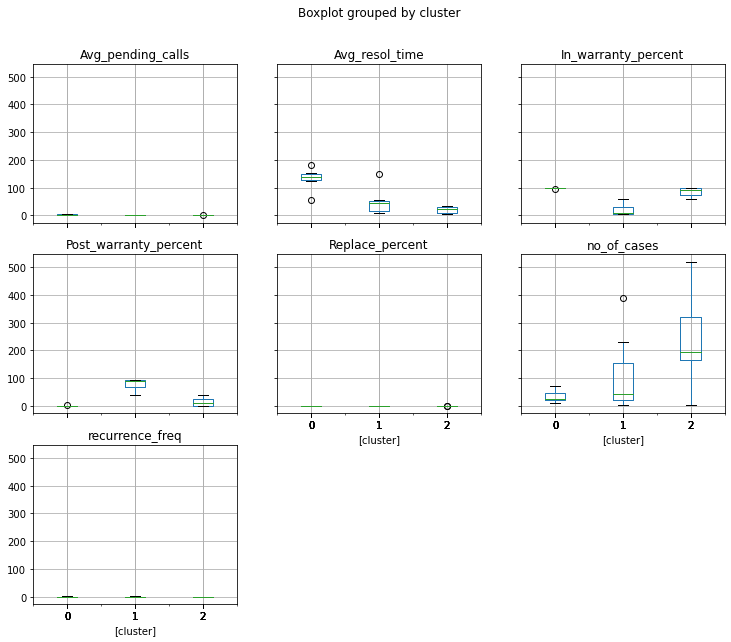

In [25]:
tech_supp_df.boxplot(by='cluster',layout=(3,3),figsize=(12,10))

In [26]:
#create model with 5 clusters
model=KMeans(n_clusters=5,random_state=1)
model.fit(tech_supp_df_scaled)
prediction=model.predict(tech_supp_df_scaled)

In [27]:
tech_supp_df['cluster1']=prediction

array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[cluster1]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[cluster1]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[cluster1]'>],
       [<AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[cluster1]'>,
        <AxesSubplot:title={'center':'Replace_percent'}, xlabel='[cluster1]'>,
        <AxesSubplot:title={'center':'cluster'}, xlabel='[cluster1]'>],
       [<AxesSubplot:title={'center':'no_of_cases'}, xlabel='[cluster1]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[cluster1]'>,
        <AxesSubplot:>]], dtype=object)

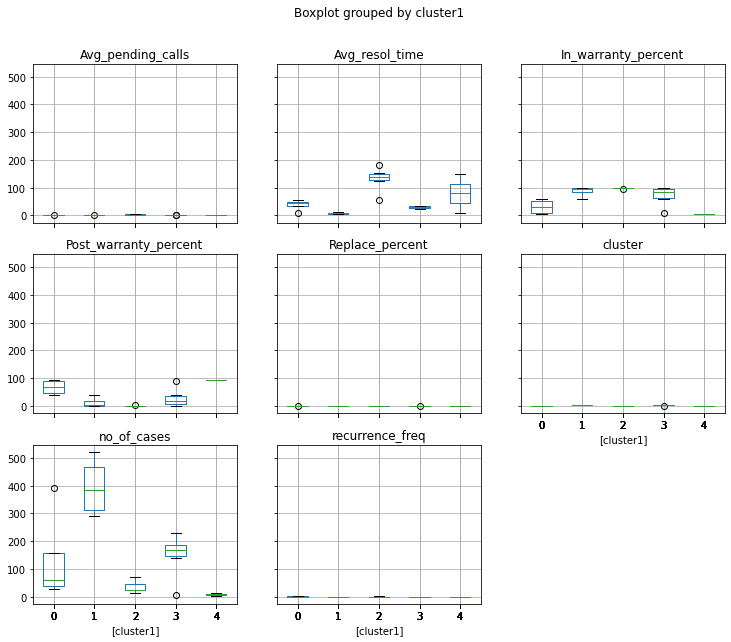

In [28]:
tech_supp_df.boxplot(by='cluster1',layout=(3,3),figsize=(12,10))

## Classification

**To remember**
- Classification is a supervised machine learning technique
- There are two main types of classification algorigthms:
    - classification (categorical variables)
        - binary
        - multi-class
    - regression (numerical variables)
- We use train-test split on data (x & y) where:
    - x has the all variables used for the model
    - y has the taget variable
- We use hyperparameter tunning to experiment with a algorithm to find the best performance
- We use accuracy and confusion matric (recall and precion) to check the performance of the algorithm 

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
credit_data = pd.read_csv("creditData_ready.csv")
credit_data.dtypes

checking_balance                int64
months_loan_duration            int64
credit_history                  int64
amount                          int64
savings_balance                 int64
employment_duration             int64
percent_of_income               int64
years_at_residence              int64
age                             int64
existing_loans_count            int64
dependents                      int64
phone                           int64
default                         int64
purpose_business                int64
purpose_car                     int64
purpose_car0                    int64
purpose_education               int64
purpose_furniture/appliances    int64
purpose_renovations             int64
housing_other                   int64
housing_own                     int64
housing_rent                    int64
other_credit_bank               int64
other_credit_none               int64
other_credit_store              int64
job_management                  int64
job_skilled 

In [34]:
credit_data.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0


In [30]:
credit_data.shape

(1000, 29)

In [39]:
#class imbalance 
credit_data.default.value_counts()

0    700
1    300
Name: default, dtype: int64

In [35]:
X=credit_data.drop('default',axis=1)
y=credit_data.pop('default')

In [44]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=1,stratify=y)

In [47]:
random_forest=RandomForestClassifier(random_state=1)

In [48]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [49]:
random_forest.score(X_train,y_train)

1.0

In [50]:
random_forest.score(X_test,y_test)

0.7533333333333333

In [53]:
from sklearn import metrics

def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

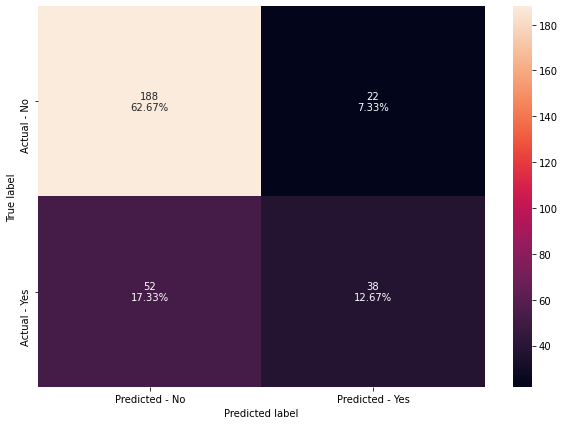

In [54]:
make_confusion_matrix(random_forest,y_test)

In [58]:
class_weight={0: 0.3, 1: 0.7}

In [59]:
random_forest1=RandomForestClassifier(random_state=1,class_weight=class_weight)

In [60]:
random_forest1.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=1)

In [61]:
random_forest1.score(X_train,y_train), random_forest1.score(X_test,y_test)

(1.0, 0.7433333333333333)

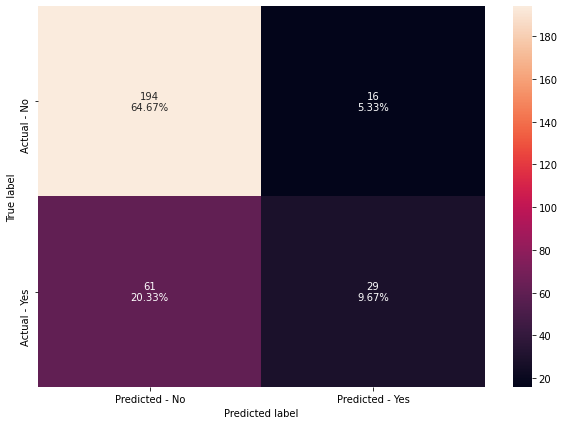

In [62]:
make_confusion_matrix(random_forest1,y_test)